# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


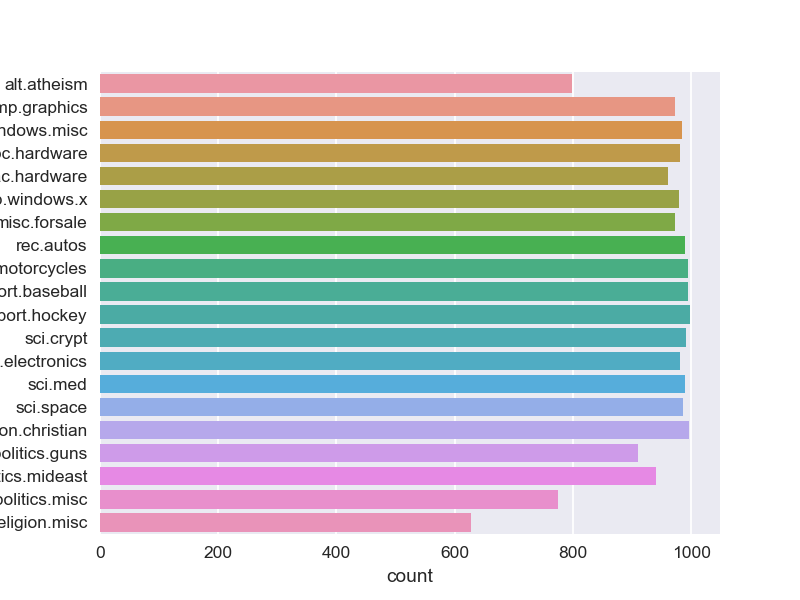

In [0]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [3]:
import os
import re
from tqdm.notebook import tqdm
import nltk 
import spacy

In [4]:
arr = os.listdir('documents')
#print(arr)

# Get the documents Label

In [5]:
def get_labels(arr):
    label_arr=[]
    for i in arr:
        label_arr.append((i.split('_')[0]).replace('.','_'))
        
    return label_arr

In [6]:
label_arr=get_labels(arr)

# Extracting Mails

In [9]:
def email_extractor(file_name):
    email_arr=[]
    file=open(file_name, 'r') 
    data = file.read()
    emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", data)
        
            
    #print(emails)
    if(len(emails)>0):
        for items in emails:
            data=data.replace(items,' ')
            temp= items.split('@')[1].split('.') 
            for i in temp:
                if(len(i)>2 and i!='com'):
                    email_arr.append(i)
                #email_arr.append(temp)
    #file.write(data) 
    file.close()
    file=open(file_name, 'w')
    file.write(data)
    file.close()
    result=[]
    #print(data)
    for x in email_arr:
        result.append(x)
    return list(set(result))

In [10]:
mail_array=[]
for i in (range(len(arr))):
    mail_array.append((email_extractor("documents//"+arr[i])))

In [12]:
mail_array[-1]


['quack', 'osrhe', 'kfu', 'okcforum', 'edu']

In [13]:
def convert(lst):
      
    return ' '.join(lst)

In [14]:
processed_mails=[]
for i in (range(len(mail_array))):
    processed_mails.append(convert(mail_array[i]))

In [15]:
len(processed_mails)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

# extractingthe subject of a mail

In [ ]:
# my_sent = '''
# WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, Loretta E. Lynch, 
# the top federal prosecutor in Brooklyn, spoke forcefully about the pain of a broken trust that African-Americans felt
# and said the responsibility for repairing generations of miscommunication and mistrust fell to law enforcement.
# '''  
# #my_sent=re.sub('\W+',' ', my_sent )

# #my_sent='my name is Bhawesh Bhashkar'

# parse_tree = nltk.ne_chunk(nltk.tag.pos_tag(my_sent.split()), binary=True)  # POS tagging before chunking!

# named_entities = []
# #named_entities2=[]
# for t in parse_tree.subtrees():
#     if (t.label() == 'NE'  ):
#         #named_entities2.append(t)
#         named_entities.append(list(t))  # if you want to save a list of tagged words instead of a tree
#     if (  t.label() == 'NNP'):
#         named_entities.append(list(t))

# print (named_entities)


In [ ]:
# #https://stackoverflow.com/questions/24398536/named-entity-recognition-with-regular-expression-nltk

# def get_continuous_chunks(text):
#     chunked = nltk.ne_chunk(pos_tag(nltk.word_tokenize(text)))
#     prev = None
#     continuous_chunk = []
#     current_chunk = []

#     for i in chunked:
#         if type(i) == Tree:
#             current_chunk.append(" ".join([token for token, pos in i.leaves()]))
#         elif current_chunk:
#             named_entity = " ".join(current_chunk)
#             if named_entity not in continuous_chunk:
#                 continuous_chunk.append(named_entity)
#                 current_chunk = []
#         else:
#             continue

#     if continuous_chunk:
#         named_entity = " ".join(current_chunk)
#         if named_entity not in continuous_chunk:
#             continuous_chunk.append(named_entity)

#     return continuous_chunk

# #txt = "Barack Obama is a great person." 
# names= (get_continuous_chunks(string))

In [529]:
# string="""
# The Washington Post is an American daily newspaper published in Washington, D.C. 
# It is the most-widely circulated newspaper within the Washington metropolitan area, and has a large national audience.
# Daily broadsheet editions are printed for D.C., Maryland, and Virginia. 
# """

In [ ]:

nlp = spacy.load('en_core_web_sm')

# #doc = nlp('WASHINGTON --)
# #print([ent for ent in doc.ents])

In [ ]:
# doc=nlp(string)

In [ ]:
# print([ent for ent in doc.ents])

In [19]:
# print("original Sentence : ",my_sent)
# print()


# for i in names:
#     name='_'.join(i.split())
#     my_sent=my_sent.replace(i,name)
    
# print(my_sent)

In [20]:
# print("original Sentence : ",my_sent)
# print()
# for i in range(len(named_entities)):
#     temp=named_entities[i]
#     word=''
#     word_original=''
#     for i in temp:
#         #my_sent.replace(i,'$$$$')
#         word_original=word_original+i[0]+' '
#         word=word+i[0]+'_'
#     my_sent=my_sent.replace(word_original[:-1],word[:-1]+' ')
# print(my_sent)

In [ ]:
print("Hello")

In [459]:
#list(chunk)

In [252]:
#Remove HTML Tags
TAG_RE = re.compile(r'<[^>]+>')
x=TAG_RE.sub('', x)

# Remove parantheses and Brackets
fun=re.compile(r"[\(\[].*?[\)\]]")
fun.sub('',x)

'This is a sentence.    '

In [ ]:
# def get_subject(file_name):
    
#     file=open(file_name, 'r') 
#     data = file.readlines()
#     for i in range(len(data)):
#         line=data[i].strip().capitalize()
#         if (line.startswith(('Subject:'))):
#             text=line.replace('Subject:','')
            
            
#             text=text.split(' ')
#             text=[word.strip() for word in text]
#             text=[word for word in text if not word.endswith((':')) ]
#             text=convert(text)
#             text=re.sub('\W+',' ', text )
            
            
            
            
#             data[i]=''
#         if(line.startswith(('From:')) or line.startswith(('Write to:')) ):
#             data[i]=''
            
#     return text
        

In [ ]:
# #strs = "how much for the maple syrup? $20.99? That's ricidulous!!!"
# #data_refined=''
# for i in range(len(data)):
    
#     #removing words which ends with :
#     text=data[i].split(' ')
#     text=[word.strip() for word in text]
#     text=[word for word in text if not word.endswith((':')) ]
#     text=convert(text)
#     text=re.sub('\W+',' ', text )
    
#     # Removing special Characters 
#     text = re.sub(r'[?|$|!]',r'',text)
#     text = re.sub(r'[^a-zA-Z0-9 ]',r'',text)
#     text=re.sub('\W+',' ', text )
#     text=re.sub(r'\w+:\s?','',text)
#     text=re.sub('\W+',' ', text )
#     text=re.sub(r'\w+:\s?','',text)
    
#     #Removing Extra Empty Lines
    
#     print (text,end='')
#     print()

# #nstr = re.sub(r'[?|$|.|!]',r'',strs)
# #print (nstr)
# #nestr = re.sub(r'[^a-zA-Z0-9 ]',r'',nstr)
# #print (nestr)

In [17]:
def convert_(lst):
      
    return '\n'.join(lst)

# Extract Subject and clean text 

In [18]:

subject_list=[]
for i in tqdm(range(len(arr))):
    file=open("documents//"+arr[i], 'r') 
    data = file.readlines()
    file.close()
    local_subject=[]
    
    for j in range(len(data)):
            line=data[j].strip()
            if (line.startswith(('Subject:')) ):
                text=line.replace('Subject:','')
                # Removing The Subject of the mail 
                text=text.split(' ')
                text=[word.strip() for word in text]
                text=[word for word in text if not word.endswith((':')) ]
                text=convert(text)
                text=re.sub('\W+',' ', text )
                local_subject.append(text)
                
                data[j]=''
            if(line.startswith(('From:')) or line.startswith(('Write to:')) ):
                data[j]=''
            #removing words which ends with :
            text=data[j].split(' ')
            text=[word.strip() for word in text]
            text=[word for word in text if not word.endswith((':')) ]
            text=convert(text)
            text=re.sub('\W+',' ', text )

            # Removing special Characters 
            text = re.sub(r'[?|$|!]',r'',text)
            text = re.sub(r'[^a-zA-Z0-9 ]',r'',text)
            text=re.sub('\W+',' ', text )
            text=re.sub(r'\w+:\s?','',text)
            text=re.sub('\W+',' ', text )
            text=re.sub(r'\w+:\s?','',text)
            data[j]=text       
    subject_list.append(convert(local_subject))       
    
    data=convert_(data)        
    with open("documents//"+arr[i], "w") as text_file:
        text_file.write(data)
    #file.write(data)
    #file.close()
    

# Remove Tags and Brackets

In [24]:
remove_tag = re.compile(r'<[^>]+>')
#x=TAG_RE.sub('', x)

remove_bracket=re.compile(r"[\(\[].*?[\)\]]")
#fun.sub('',x)

# Remove NewLines & Tabs and decontracting the words

In [25]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:

for i in tqdm(range(len(arr))):
    file=open("documents//"+arr[i], 'r') 
    data = file.read()
    file.close()
    data=(' '.join((decontracted(data).split())))
    file=open("documents//"+arr[i], 'w')
    file.write(data)
    file.close()



# Removing Numbers

# Named Entity Recognition


# Further preprocessing 

In [31]:
remove_num = re.compile(r'[0-9]+')

In [32]:
# Remove Numbers 
#Remove all the underscores
# Remove all the words wich are connected with underscore and having length less than or equal to 2
# Convert all the words to Lower case

for i in tqdm(range(len(arr))):

    file=open("documents//"+arr[i], 'r') 
    data = file.read()
    file.close()
    
    # Remove digits
    data=remove_num.sub('',data)
    data=' '.join(data.split())
    
    file=open("documents//"+arr[i], 'w') 
    file.write(data)
    file.close()
    


# NER Using Spacy

In [34]:
nlp = spacy.load('en_core_web_sm')
#doc=nlp(data)
#ner=([ent for ent in doc.ents])

In [35]:
for i in tqdm(range(len(arr))):

    file=open("documents//"+arr[i], 'r') 
    data = file.read()
    file.close()
    
    # find NER using Spacy
    doc=nlp(data)
    ner=[ent for ent in doc.ents]
    for j in ner:
        temp='_'.join(str(j).split()) 
        data=data.replace(str(j),temp)
    
    
    
    
    
    file=open("documents//"+arr[i], 'w') 
    file.write(data)
    file.close()
    


# Remove all the words having length less than 2

In [37]:
shortword = re.compile(r'\W*\b\w{1,2}\b')

In [38]:
for i in tqdm(range(len(arr))):

    file=open("documents//"+arr[i], 'r') 
    data = file.read()
    file.close()
    
    # lower all the word 
    data=data.lower()
    # Remove the short words
    data=shortword.sub('', data)
    
    
    
    file=open("documents//"+arr[i], 'w') 
    file.write(data)
    file.close()
    


In [39]:
# https://www.geeksforgeeks.org/find-words-greater-given-length-k/
def string_15( str):
    string = []
    text = str.split(" ")
    for x in text:
        if len(x) < 15 :
            string.append(x)
        else:
            print(x)
    string=' '.join(string)
    return string

In [40]:
# Getting all the text into list
processed_text=[]
for i in tqdm(range(len(arr))):
    file=open("documents//"+arr[i], 'r') 
    data = file.read()
    file.close()
    processed_text.append(data)

# The below code conferms the existance of short words in Text

In [42]:
count_a=[]
count_an=[]

for i in tqdm(range(len(arr))):
    file=open('documents//'+arr[i],'r')
    data=file.read()
    file.close()
    data=data.split()
    count_a.append(data.count('a'))
    count_an.append(data.count('an'))
    
sum(count_a) , sum(count_an)

(0, 0)

### Our subject list has words wich has length less than 2

In [43]:
# Removing short words from the subject list
for i in tqdm(range(len(subject_list))):
    data=subject_list[i]
    # lower all the word 
    data=data.lower()
    # Remove the short words
    subject_list[i]=shortword.sub('', data)

# Making Data Frame

In [45]:
import pandas as pd

In [46]:
df =pd.DataFrame(list(zip(subject_list, processed_mails,processed_text,label_arr)),columns =['Subject', 'Emails','Text','Label'])
df.head()

,Subject,Emails,Text,Label
0,alt atheism atheist resources,netcom mantis,atheism resources resources december atheist_r...,alt_atheism
1,alt atheism introduction atheism,mantis,atheism introduction introduction april begin ...,alt_atheism
2,gospel dating,umd mimsy dbstu1 tu-bs edu,article charley_wingate well john has quite d...,alt_atheism
3,university violating separation church state,unh mantis edu kepler,until kings become philosophers philosophers b...,alt_atheism
4,soc motss princeton axes matching funds for b...,ibm ida harder ccr-p watson org,article nhy bob_mcgwier however hate economic...,alt_atheism


In [85]:
# Saving the data frame 
df.to_csv('df1.csv')

In [47]:
# Combining columns 

df['Column_combined'] = df[df.columns[0:3]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [6]:
x=df1['Column_combined']
y=df1['Label']

# Train Test split

In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize 

In [8]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42,stratify=y)
x_train.shape , x_test.shape

((15062,), (3766,))

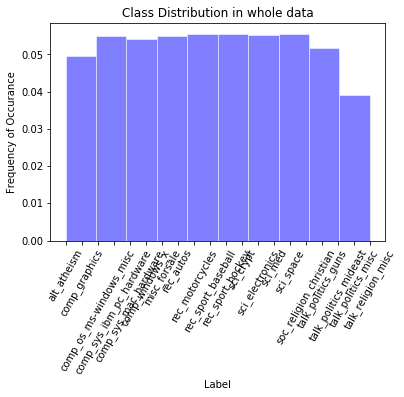

In [82]:
#plt.figure(figsize=(10,10))
plt.hist(y,color ='blue', alpha = 0.5,density=True,edgecolor='white') 
plt.xticks(rotation=60)
plt.title("Class Distribution in whole data")
plt.xlabel("Label")
plt.ylabel("Frequency of Occurance")
print()

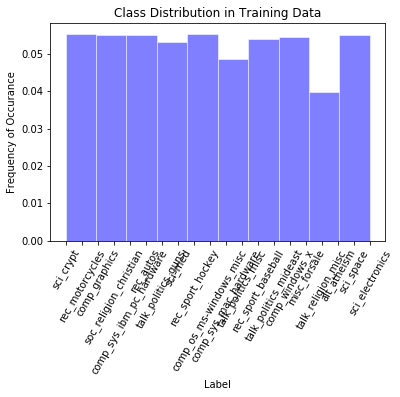

In [83]:
#plt.figure(figsize=(10,10))
plt.hist(y_train,color ='blue', alpha = 0.5,density=True,edgecolor='white') 
plt.xticks(rotation=60)
plt.title("Class Distribution in Training Data")
plt.xlabel("Label")
plt.ylabel("Frequency of Occurance")
print()

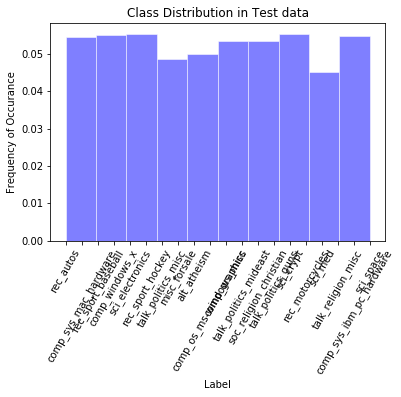

In [84]:
#plt.figure(figsize=(10,10))
plt.hist(y_test,color ='blue', alpha = 0.5,density=True,edgecolor='white') 
plt.xticks(rotation=60)
plt.title("Class Distribution in Test data")
plt.xlabel("Label")
plt.ylabel("Frequency of Occurance")
print()

# Now we will buid the corpuse


In [9]:
#Replacing all the commas 
sentence_list=list(x_train)
sentence_list=[i.replace(',', ' ').strip() for i in sentence_list]

In [37]:
#Replacing all the commas in test 
test_sentence_list=list(x_test)
test_sentence_list=[i.replace(',', ' ').strip() for i in test_sentence_list]

In [13]:
# Building the word corpuse
wrod_list=[i.split() for i in sentence_list]

In [15]:
# https://www.geeksforgeeks.org/python-convert-a-nested-list-into-a-flat-list/
# Nested list to simple list conversion
output = []   
def reemovNestings(wrod_list):
    for i in wrod_list:
        if type(i) == list:
            reemovNestings(i)
        else:
            output.append(i)
            
reemovNestings(wrod_list)

In [18]:
len(output)

2922941

In [60]:
len(output)

2922941

In [19]:
# Remove all the words having length more than 15
output=[i for i in output if len(i) <15 ]

In [20]:
len(output)

2879413

In [21]:
len(output),len(wrod_list)

(2879413, 15062)

# Unique words with unique integer labels in dict 

In [23]:
unique_words=list(set(output))

In [25]:
int_label=[i+1 for i in range(len(unique_words))]
len(int_label)

113309

In [29]:
%%time
word_dict=dict(zip(unique_words, int_label))

Wall time: 54.9 ms


### The below code builds a dictionary of word and its frequency as key value pair

In [ ]:
# %%time
# #building the word : frequency dictionary
# word_dict=dict.fromkeys(unique_words,'10000')
# for i in unique_words:
#     word_dict[i]=output.count(i)

In [ ]:
# # 
# word_df=pd.DataFrame(word_dict.items(), columns=['Word', 'Frequency'])

In [ ]:
# word_df.head()

In [ ]:
# word_df=word_df.sort_values(by=['Frequency'],ignore_index=True,ascending=False)

In [ ]:
# word_df.to_csv('word_df_list_2.csv')

### Loading the pre saved dictionary file

In [67]:
word_df=pd.read_csv('word_df_list_2.csv')

In [77]:
word_df_list=list(word_df['Word'])

In [0]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [0]:
# provide a text file name with proper path
def preprocess(file_name):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    data=open(file_name,'r')
    
    data=data.readlines()
    
    email_arr=[]
    
    data_temp='\n'.join(data)
    emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", data_temp)
        
            
    #print(emails)
    if(len(emails)>0):
        for items in emails:
            data_temp=data_temp.replace(items,' ')
            temp= items.split('@')[1].split('.') 
            for i in temp:
                if(len(i)>2 and i!='com'):
                    email_arr.append(i)
                #email_arr.append(temp)
    
    
    subject_list=[]
    #Extract Subject
    local_subject=[]
    for j in range(len(data)):
            line=data[j].strip()
            if (line.startswith(('Subject:')) ):
                text=line.replace('Subject:','')
                # Removing The Subject of the mail 
                text=text.split(' ')
                text=[word.strip() for word in text]
                text=[word for word in text if not word.endswith((':')) ]
                text=convert(text)
                text=re.sub('\W+',' ', text )
                local_subject.append(text)
                
                data[j]=''
            if(line.startswith(('From:')) or line.startswith(('Write to:')) ):
                data[j]=''
            #removing words which ends with :
            text=data[j].split(' ')
            text=[word.strip() for word in text]
            text=[word for word in text if not word.endswith((':')) ]
            text=convert(text)
            text=re.sub('\W+',' ', text )

            # Removing special Characters 
            text = re.sub(r'[?|$|!]',r'',text)
            text = re.sub(r'[^a-zA-Z0-9 ]',r'',text)
            text=re.sub('\W+',' ', text )
            text=re.sub(r'\w+:\s?','',text)
            text=re.sub('\W+',' ', text )
            text=re.sub(r'\w+:\s?','',text)
            data[j]=text       
    subject_list.append(convert(local_subject))  
    
    data='\n'.join(data)
    
    
    
    #Decontraction
    data=(' '.join((decontracted(data).split())))
    
    #Remove Numbers
    data=remove_num.sub('',data)
    data=' '.join(data.split())
    
    #NER
    doc=nlp(data)
    ner=[ent for ent in doc.ents]
    for j in ner:
        temp='_'.join(str(j).split()) 
        data=data.replace(str(j),temp)
    
    # Lower and remove words having length less than 2 removal
    
    data=data.lower()
    # Remove the short words
    data=shortword.sub('', data)
    
    return ((' '.join(list(set(email_arr)))),subject_list,data)

In [ ]:
results_=preprocess('documents_original//'+arr[0])

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

In [44]:
import pandas as pd
from tqdm.notebook import tqdm

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>